In [1]:
from __future__ import division

import collections
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.decomposition import PCA

## NN libs
import keras
from keras import backend as K
from keras import regularizers
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import TensorBoard

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import config
import os, numpy as np, pandas, sklearn, scipy.signal as signal
import mido
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# local libs
import config, models, setup, compression, ncd_evaluation
import midi
import midi.decode
from midi import generators as g
from utils import io, models_io, utils, plot, string
from capsule.layers import Capsule, Length
from capsule.capsulefunctions import squash, softmax, margin_loss

In [4]:
context = setup.init(max_bars=4)

 Context :: namedtuple(
[ max_t = float
, dt = float
, n_timestesp = int
, note_length = int
, bpm = float
, tempo = float
, ticks_per_beat = int
]

Setting up params

max min f 20.0 0.25
 >> Context(max_t=4.0, dt=0.025, n_timesteps=160, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
 sample length:  160.000000
 max_f: 20.000000, min_f: 0.250000


In [5]:
mido.Message(type='note_on').type

'note_on'

In [6]:
path = 'datasets/drum_midi//Midi.Styles.Percussion/XLN/Loud Song 001 (124 BPM)'
io.ignore_path(path)

 [INFO] : 
 |  path ignored: name `Midi.Styles.Percussion` in IGNORE_DIRS


True

In [7]:
path.split('/')

['datasets',
 'drum_midi',
 '',
 'Midi.Styles.Percussion',
 'XLN',
 'Loud Song 001 (124 BPM)']

In [8]:
n = 500 * 2
dim4 = True
multiTrack = True
reduce_dims = midi.ReduceDimsOptions.NONE # GLOBAL
dn = 'drum_midi/'
v = None # float | None
x_train, labels = setup.import_data(context, n, dim4=dim4, reduce_dims=reduce_dims, 
    dirname=dn, multiTrack=multiTrack, velocity=v, r=True)


Importing midi-data
walk_and_search(../datasets/drum_midi/)
path ../datasets/drum_midi/
path ../datasets/drum_midi/Cha cha
 [INFO] : 
 |  path ignored: name `Cha cha` in IGNORE_DIRS
path ignored: ../datasets/drum_midi/Cha cha 

path ../datasets/drum_midi/50´s Drummer MIDI Files
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM
  05 8th Hat.mid
  03 8th Ride.mid
  04 8th Perc.mid
  06 8th Perc.mid
  02 8th Hat.mid
  07 8th Perc.mid
  01 8th Hat.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/05 Straight Line 136BPM
  06 8th hat.mid
  02 8th Ride.mid
  05 8th Ride.mid
  03 8th Ride.mid
  07 8th Toms.mid
  04 8th Perc.mid
  01 8th Hat.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/02 Gogo 191BPM
  06 8th Toms.mid
  05 8th Snare.mid
  04 8th Ride.mid
  07 8th Toms.mid
  02 8th Snare.mid
  01 8th Hat.mid
  03 4th Snare .mid
path ../datasets/drum_

path ../datasets/drum_midi/50´s Drummer MIDI Files/04 Country/02 Marching 94BPM
  07 8th Multi.mid
  05 8th Snare.mid
  01 8th Snare.mid
  03 8th Perc.mid
  02 8th Snare.mid
  04 8th Toms.mid
  06 8th Multi.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/03 Traditional Pop
path ../datasets/drum_midi/50´s Drummer MIDI Files/03 Traditional Pop/10 Frewild 152BPM
  06 16th Perc.mid
  03 4th Hat.mid
  03 16th Hat.mid
  07 16th Multi.mid
  01 4th Hat.mid
  04 16th Ride.mid
  05 16th Toms.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/03 Traditional Pop/01 Fly High 115BPM
  03 8th Hat.mid
  07 8th Multi.mid
  05 8th Ride.mid
  06 8th Ride.mid
  02 8th Hat.mid
  01 8th Hat.mid
  04 8th Hat.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/03 Traditional Pop/07 Lester Lee 133BPM
  03 8th Hat.mid
  06 8th Toms.mid
  02 8th Ride.mid
  05 8th Perc.mid
  04 8th Perc.mid
  07 8th Ride.mid
  01 8th Hat.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/03 Traditional Pop/04 Lo

path ../datasets/drum_midi/70´s Drummer MIDI Files/Tight Kit/03 Disco/10 Baby 132BPM
  15 16th Ride.mid
  01 16th Hat Both.mid
  13 16th Hat Closed.mid
  10 8th Ride.mid
  02 16th Hat Both.mid
  08 8th Hat Closed Ghost.mid
  03 16th Hat Closed.mid
  11 8th Ride.mid
  12 4th Hat Closed Perc.mid
  06 8th Ride.mid
  14 8th Ride.mid
  09 8th Hat Closed.mid
  04 4th Hat Open.mid
  05 8th Hat Both.mid
  07 8th Hat Closed.mid
path ../datasets/drum_midi/70´s Drummer MIDI Files/Tight Kit/03 Disco/09 Freak 115BPM
  03 4th Hat Open.mid
  12 8th Hat Both Ghost.mid
  04 16th Hat Both.mid
  06 16th Hat Closed.mid
  05 8th Ride.mid
  07 16th Hat Both.mid
  02 16th Hat Closed.mid
  10 8th Hat Closed Side.mid
  11 8th Ride Hat Side.mid
  01 8th Hat Closed.mid
  13 8th Ride Hat Ghost.mid
  14 8th Hat Closed.mid
  09 8th Hat Closed.mid
  08 16th Hat Both.mid
  15 8th Ride Hat Ghost.mid
path ../datasets/drum_midi/70´s Drummer MIDI Files/Tight Kit/03 Disco/04 Classic 119BPM
  14 16th Hat Closed Ride.mid
  

 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]


In [9]:
genres = [string.extract_labels_from_filename(k) for k in labels]
# genre_dict = setup.build_label_dict(genres)

In [10]:
[(i,k) for i,k in enumerate(labels)]

[(0,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/05 8th Hat.mid"),
 (1,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/03 8th Ride.mid"),
 (2,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/04 8th Perc.mid"),
 (3,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/06 8th Perc.mid"),
 (4,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/02 8th Hat.mid"),
 (5,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/07 8th Perc.mid"),
 (6,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/01 8th Hat.mid"),
 (7,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/05 Straight Line 136BPM/06 8th hat.mid"),
 (8,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/05 Straight Line 136BPM/02 8th Ride.mid"),
 (9,
  "../datasets/drum_midi/5

In [11]:
genres[0][-2:]

["01 Rock'n'Roll", '06 Moonglow 140BPM']

In [12]:
unique_genres = set(genre[-1] for genre in genres)
len(unique_genres)

108

In [13]:
x_train.shape

(1000, 160, 10, 1)

In [14]:
m = int(x_train.shape[0] * 0.9)
x_train.shape, m

((1000, 160, 10, 1), 900)

In [15]:
x_test = x_train[m:]
x_train = x_train[:m]

In [16]:
# genres = [string.extract_labels_from_filename(k) for k in labels]
genre_dict = setup.build_label_dict(genres[:m])

m (50, 10)


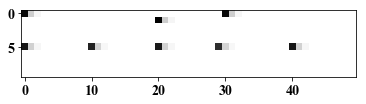

m (50, 10)


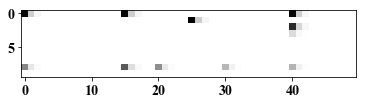

array(["../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/05 8th Hat.mid",
       '../datasets/drum_midi/50´s Drummer MIDI Files/06 Soul - Funk/10 Syncopated Ride 128BPM/03 16th Cym.mid'],
      dtype='<U119')

In [17]:
i = 0
j = 399
plot.single(x_train[i, :50,:,0])
plot.single(x_train[j, :50,:,0])
# plot.single(x_train[2, :50,:,0])
np.array(labels)[[i,j]]

In [18]:
input_shape = x_train[0].shape
timesteps = input_shape[0]
notes = input_shape[1]
input_shape

(160, 10, 1)

In [19]:
latent_dim = 10
epsilon_std = 1.0

In [20]:
encoder_model, encoder_input, z_mean, z_log_var = models.encoder(input_shape, latent_dim)
encoder_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 160, 10, 1)   0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 160, 10)      0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 159, 64)      1344        reshape_1[0][0]                  
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 256)          197632      conv1d_1[0][0]                   
__________________________________________________________________________________________________
z_mean (De

In [21]:
sample_ = lambda args: models.sample(args, z_mean, z_log_var, latent_dim, epsilon_std)

In [22]:
# z = Lambda(sampling)([z_mean, z_log_var])
z_input = encoder_model(encoder_input)
z_output = Lambda(sample_)(z_input)

In [23]:
decoders = models.list_decoders(input_shape)
decoded = utils.composition(decoders, z_output, verbose=False)

In [24]:
# instantiate VAE model
vae_input = encoder_input
vae_output = decoded
vae = Model(vae_input, vae_output)
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 160, 10, 1)   0                                            
__________________________________________________________________________________________________
encoder_model- (Model)          [(None, 10), (None,  204116      input_1[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 10)           0           encoder_model-[1][0]             
                                                                 encoder_model-[1][1]             
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          2816        lambda_2[0][0]                   
__________

In [25]:
# vae.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [26]:
vae_loss = models.vae_loss(vae_input, vae_output, z_mean, z_log_var, timesteps, notes, beta=0.75, gamma=0.05)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')
# vae.compile(optimizer=optimizer, loss=loss, metrics=metrics)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Output "reshape_2" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "reshape_2" during training.
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
batch_size = 128
epochs = 500
params = {'batch_size': batch_size, 'return_y': False}

In [28]:
# phase_mod = 0.01
# whitening = False

In [29]:
# m = 1000
# useDataGenerator = False
# # useDataGenerator = True
# callbacks = [TensorBoard(log_dir=config.tmp_log_dir)]

# x = x_train[:m]
# # x = x_train
# # i = [0,1, 7,8, 14,15, 399,400]
# # x = x_train[i]
# # x = np.concatenate([x for _ in range(10)])
# print('x:', x.shape)

# print('batch_size: %i' % batch_size)
# print('update-iterations:', round(epochs * x.shape[0] / batch_size))
# if useDataGenerator:
#     datagen = models.ImageDataGenerator(x_train, batch_size, phase_mod, whitening)
#     history = collections.defaultdict(list)
#     n_batches = datagen.__len__()
#     for e in range(epochs):
#         print('\n[Epoch %i/%i] >>>>>>>>>' % (e, epochs))
#         for batch_i, (x_batch, y_batch) in enumerate(datagen.flow(x, x, batch_size)):
#             print(' Batch %i/%i' % (batch_i,n_batches))
#             x_ = x_batch
#             # x_ = datagen.shuffle_3rd_dim(x_)
#             # x_ = datagen.shuffle_3rd_dim_soft(x_, rate=0.5, scale=0.1, verbose=0)
#             h = vae.fit(x_, validation_data=(x_test, None), verbose=0)
#             for k,v in h.history.items(): 
#                 print(' \\_%s' % k, [round(v_,) for v_ in v])
#                 history[k].append(v)
#             if batch_i >= n_batches:
#                 break
# else:
#     h = vae.fit(x, epochs=epochs, validation_data=(x_test, None), callbacks=callbacks)
#     history = h.history

In [30]:
fn = config.model_dir + 'hi_res-v3p-4_vae.h5'
# fn = config.model_dir + 'hi_res2c_vae.h5'

In [31]:
# io.save_dict('../logs/','train_loss', history)

In [32]:
# # for suffix, model in [('vae',vae), ('encoder',encoder), ('gen',generator)]:
# #     model.save_weights(dn + prefix + suffix + '.h5', "w")
# vae.save_weights(fn, "w")

In [33]:
vae.load_weights(fn)

In [34]:
# plt.plot(history['loss'])
# plt.plot(history['val_loss'])
# plt.ylim(0,150)

m (50, 10, 1)


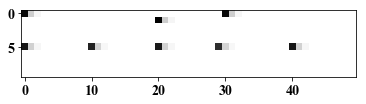

m (50, 10, 1)


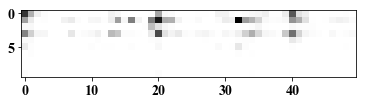

m (50, 10, 1)


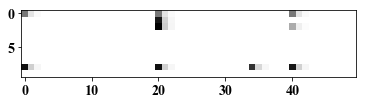

m (50, 10, 1)


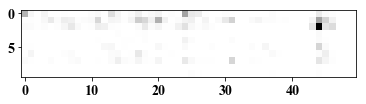

In [35]:
i,j = 0, 10
m = 50
y = vae.predict(x_train[:500])
plot.single(x_train[i,:m])
plot.single(y[i,:m])
plot.single(x_train[j,:m])
plot.single(y[j,:m])

In [36]:
# x = datagen.shuffle_3rd_dim_soft(x_train[:10], rate=1, intensity=2, scale=1, verbose=1)
# i = 0
# plot.single(x_train[i,:,:,0])
# plot.single(x[i,:,:,0])
# x_ = vae.predict(x)
# plot.single(x_[i,:,:,0])

In [37]:
# # min: these pixels are 'always' active
# m = x.min(axis=0)
# plot.multi(m[:30,:,0])

In [38]:
# # mean
# m = x.mean(axis=0)
# plot.single(m[:30,:,0])

## Encoder + Decoder (generator)
A model to project inputs on the latent space

In [39]:
# build a model to project inputs on the latent space
encoder = Model(encoder_input, z_mean)

In [40]:
generator_input = Input((latent_dim,))
generator_layers_ = utils.composition(decoders, generator_input)
generator = Model(generator_input, generator_layers_)

In [41]:
decoder = generator

## Style transfer

In [42]:
import sklearn.feature_selection
import sklearn.ensemble

In [43]:
# pca = PCA(n_components=3)
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# It uses the LAPACK implementation of the full SVD or a randomized truncated SVD by the method of Halko et al. 2009,
# depending on the shape of the input data and the number of components to extract.

In [44]:
m = 1000
x_train_encoded = encoder.predict(x_train[:m], batch_size=batch_size)
x_train_encoded.shape

(900, 10)

In [45]:
import transformation_extraction

In [46]:
best_dims, importances, transformations, min_transformations = \
    transformation_extraction.between_genres(x_train_encoded, genre_dict, amt=5, v=1)


 Genre A: 01 Rock'n'Roll/06 Moonglow 140BPM
  genre B: 	01 Rock'n'Roll/05 Straight Line 136BPM (len: 7)
 	 i: 9, importance: 0.217180
  genre B: 	01 Rock'n'Roll/02 Gogo 191BPM (len: 7)
 	 i: 9, importance: 0.291708
  genre B: 	01 Rock'n'Roll/07 Thwag 170BPM (len: 7)
 	 i: 5, importance: 0.132355
  genre B: 	01 Rock'n'Roll/04 Maybelline 233BPM (len: 7)
 	 i: 2, importance: 0.296868

 Genre A: 01 Rock'n'Roll/05 Straight Line 136BPM
  genre B: 	01 Rock'n'Roll/06 Moonglow 140BPM (len: 7)
 	 i: 9, importance: 0.213275
  genre B: 	01 Rock'n'Roll/02 Gogo 191BPM (len: 7)
 	 i: 3, importance: 0.276624
  genre B: 	01 Rock'n'Roll/07 Thwag 170BPM (len: 7)
 	 i: 8, importance: 0.172972
  genre B: 	01 Rock'n'Roll/04 Maybelline 233BPM (len: 7)
 	 i: 5, importance: 0.257411

 Genre A: 01 Rock'n'Roll/02 Gogo 191BPM
  genre B: 	01 Rock'n'Roll/06 Moonglow 140BPM (len: 7)
 	 i: 9, importance: 0.273153
  genre B: 	01 Rock'n'Roll/05 Straight Line 136BPM (len: 7)
 	 i: 3, importance: 0.298971
  genre B: 	01

In [47]:
print('avg importance: %f' % np.mean(importances))

avg importance: 0.229791


In [48]:
# list(min_transformations.items())[0]

In [49]:
for genre_A, d in min_transformations.items():
    print('\nGenre `%s` to: \n dim:\tgenre:' % genre_A)
    for genre_B, vector in d.items():
        print(' %i \t%s' % (np.argmax(vector), genre_B))  


Genre `01 Rock'n'Roll/06 Moonglow 140BPM` to: 
 dim:	genre:
 9 	01 Rock'n'Roll/05 Straight Line 136BPM
 9 	01 Rock'n'Roll/02 Gogo 191BPM
 0 	01 Rock'n'Roll/07 Thwag 170BPM
 2 	01 Rock'n'Roll/04 Maybelline 233BPM

Genre `01 Rock'n'Roll/05 Straight Line 136BPM` to: 
 dim:	genre:
 0 	01 Rock'n'Roll/06 Moonglow 140BPM
 0 	01 Rock'n'Roll/02 Gogo 191BPM
 0 	01 Rock'n'Roll/07 Thwag 170BPM
 5 	01 Rock'n'Roll/04 Maybelline 233BPM

Genre `01 Rock'n'Roll/02 Gogo 191BPM` to: 
 dim:	genre:
 0 	01 Rock'n'Roll/06 Moonglow 140BPM
 3 	01 Rock'n'Roll/05 Straight Line 136BPM
 0 	01 Rock'n'Roll/07 Thwag 170BPM
 0 	01 Rock'n'Roll/04 Maybelline 233BPM

Genre `01 Rock'n'Roll/07 Thwag 170BPM` to: 
 dim:	genre:
 0 	01 Rock'n'Roll/06 Moonglow 140BPM
 0 	01 Rock'n'Roll/05 Straight Line 136BPM
 1 	01 Rock'n'Roll/02 Gogo 191BPM
 1 	01 Rock'n'Roll/04 Maybelline 233BPM

Genre `01 Rock'n'Roll/04 Maybelline 233BPM` to: 
 dim:	genre:
 0 	01 Rock'n'Roll/06 Moonglow 140BPM
 0 	01 Rock'n'Roll/05 Straight Line 136BPM
 9 	

(array([4., 2., 2., 1., 0., 4., 0., 0., 1., 6.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

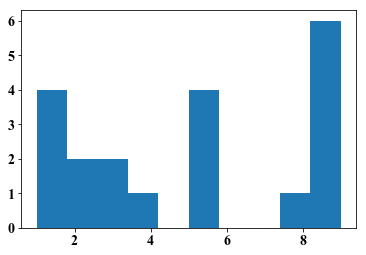

In [50]:
plt.hist(best_dims)

In [51]:
# TODO save as python object (or json)

In [52]:
# def save_transformation_dicts(transformations={}, dn='', v=0):
#     for genre_A, sub_dict in transformations.items():
#         # sub_dict :: {'genre_B_2/genre_B_2': vector}
#         a1, a2 = genre_A.split('/')
#         if a1 not in os.listdir(dn): os.mkdir(dn + a1)
#         if v:
#             print(genre_A)
#             print(sub_dict.keys())
#         io.save_dict(dn + a1, a2, sub_dict)

dn = config.plots_dir + 'transformations.pkl'
io.save(transformations, fn)
# transformation_extraction.save_to_disk(transformations, dn, v=1)

fn = config.plots_dir + 'min_transformations.pkl'
io.save(min_transformations, fn)
# transformation_extraction.save_to_disk(min_transformations, dn)

'.pkl.csv'

In [53]:
t_ = io.load(fn)

In [54]:
# transformations = io.read_categorical_dict_dir(config.plots_dir + 'transformations/')
# min_transformations = io.read_categorical_dict_dir(config.plots_dir + 'min_transformations/') 

In [55]:
list(transformations.keys())[:3]

["01 Rock'n'Roll/06 Moonglow 140BPM",
 "01 Rock'n'Roll/05 Straight Line 136BPM",
 "01 Rock'n'Roll/02 Gogo 191BPM"]

In [56]:
len(transformations.keys())

5

In [57]:
transformations[list(transformations.keys())[0]]

{"01 Rock'n'Roll/05 Straight Line 136BPM": array([-0.0089419 ,  0.00486592,  0.50188214,  0.00490901,  0.00797003,
        -0.04372824,  0.0070495 , -0.19504288,  0.0291639 ,  0.03010285],
       dtype=float32),
 "01 Rock'n'Roll/02 Gogo 191BPM": array([ 0.01877816,  0.02425638,  0.491155  , -0.03482934,  0.03180122,
        -0.02418287,  0.002482  , -0.12083082, -0.02301621,  0.02976174],
       dtype=float32),
 "01 Rock'n'Roll/07 Thwag 170BPM": array([-0.0111136 , -0.02057234,  0.34397772,  0.00427637,  0.00599479,
        -0.02433068,  0.00944436, -0.34573033,  0.00301531,  0.01300939],
       dtype=float32),
 "01 Rock'n'Roll/04 Maybelline 233BPM": array([ 0.03069773,  0.01455118,  0.84281266, -0.02870486,  0.00801724,
         0.00428061, -0.00205969, -0.28557348,  0.00103555, -0.00231666],
       dtype=float32)}

In [58]:
# def build_genre_dict(labels):
#     # result :: {genre: indices}
#     result = collections.defaultdict(list)
#     for i, genre in enumerate(labels):
#         key = genre[-2] + '/' + genre[-1]
#         result[key].append(i)
#     return result

In [59]:
# def NCD_cross(z, genre_dict, transformations, decoder, amt=None, v=0):
#     """
#     transformations :: {genre a: {genre b: z}}
#     genre_dict = {'genre': indices}
#     x = images/midi-matrices
#     z = latent vector
#     decoder has method decoder.predict(z) -> x
    
#     results = {'original genre' : {genre a': {'genre b': grid_result}}}
#     grid_result = {'scalar': ncd()}
#     """
#     sample_size = 1
#     grid = [0, 0.5, 1] # [0, 0.25, 0.5, 0.75, 1, -1, -0.5]
#     results = {}
#     if amt:
#         iter_ = list(genre_dict.keys())[:amt]
#     else:
#         iter_ = genre_dict.keys()

#     for original_genre in iter_:
#         if v: print('\noriginal genre: `%s`' % original_genre)
#         # TODO non-global ncd-s?
#         # for i in range(min(sample_size, len(indices))):
#         result = NCD_for_every_genre(z, original_genre, genre_dict, transformations, decoder, grid, v)
#         results[original_genre] = result
#     return results

# def NCD_for_every_genre(z, original_genre, genre_dict, transformations, decoder, grid=[0,1], v=0):
#     """
#     'grid search' of the NCD of original_genre to 'genre b' for all transformations
        
#     result = {genre a': {'genre b': grid_result}}} 
#     grid_results = {scalar: ncd()}    
#     """
#     result = {}
#     z_original = z[genre_dict[original_genre]]
#     for genre_a in transformations.keys():  
# #     for genre_a, indices_a in genre_dict.items():
#         if genre_a != original_genre:
#             if v:
#                 print(' genre_a `%s`' % genre_a)
#             result_genre_a = {}
#             for genre_b, transformation in transformations[genre_a].items():
#                 if genre_b != original_genre:
#                     indices_b = genre_dict[genre_b]
#                     x_b = decoder.predict(z[indices_b])
#                     result_genre_a[genre_b] = grid_search(z_original, x_b, transformation, decoder, grid)
#                     # TODO result ncd original ~ genre a
#             result[genre_a] = result_genre_a
#     return result

# def grid_search(z, x_other, transformation, decoder, grid=[0,1]):
#     result = {}
#     for value in grid:
#         z_ = models.apply_transformation(z, transformation, value)
#         x_decoded = decoder.predict(z_)
#         result[value] = compression.NCD_multiple(x_decoded, x_other)
#     return result

In [60]:
# TODO check genre-a genre-b != original

In [ ]:
result = ncd_evaluation.cross(x_train_encoded, genre_dict, min_transformations, decoder, amt=10, v=1)


original genre: `01 Rock'n'Roll/06 Moonglow 140BPM`
 genre_a `01 Rock'n'Roll/05 Straight Line 136BPM`
 genre_a `01 Rock'n'Roll/02 Gogo 191BPM`
 genre_a `01 Rock'n'Roll/07 Thwag 170BPM`
 genre_a `01 Rock'n'Roll/04 Maybelline 233BPM`

original genre: `01 Rock'n'Roll/05 Straight Line 136BPM`
 genre_a `01 Rock'n'Roll/06 Moonglow 140BPM`
 genre_a `01 Rock'n'Roll/02 Gogo 191BPM`


In [ ]:
def evaluate(data):
    """data :: {samples: {genre a: {genre b: grid}}}
    grid = {variable: outcome}
    """
    summary = collections.defaultdict(list)
    for original in data.keys():
        for genre_a in data[original].keys():
            for genre_b, grid in data[original][genre_a].items():
                for k,v in grid.items():
                    summary[k].append(v)

    print(summary.keys())
    result = collections.defaultdict(list)
    for k,v in summary.items():
        result['mean'].append(np.mean(v))
        result['median'].append(np.median(v))
        result['std'].append(np.std(v))
    print(result['mean'])
    return result, list(summary.keys())

In [ ]:
summary, x_labels = evaluate(result)
summary_ = {'Mean': summary['mean'], 'Median': summary['median']}
options = {'x_labels': x_labels, 'x_label':'Transformation intensity', 'y_label': 'ncd', 'legend':True}
plot.custom(summary_, 'NCD', options,
            type_='line', min_y_scale=None, max_y_scale=None, y_scale_margin=0.0001, show=True)

In [ ]:
options = {}
# custom(summary, 'NCD', options, relative=True, show=True)
plot.custom({'Mean':summary['mean']}, 'NCD', options, type_='bar', min_y_scale=None, max_y_scale=None, y_scale_margin=0.001, show=True)

In [ ]:
options = {}
# custom(summary, 'NCD', options, relative=True, show=True)
std = {'Mean': summary['std'], 'Median': summary['std']}
plot.custom({'Mean':summary['mean']}, 'NCD', options, type_='bar',std=std, min_y_scale=None, max_y_scale=None, y_scale_margin=0.03, show=True)

In [ ]:
plot.custom({'Median':summary['median']}, 'NCD', options, type_='bar', std=std, relative=True, show=True)

In [ ]:
m = 100
x_train_encoded = encoder.predict(x_train[:m], batch_size=batch_size)
x_train_encoded.shape

In [ ]:
i = 100
amt = 0.3
print('original')
plot.single(x_train[i])
z = encoder.predict(x_train[i:i+1])
zs = [ z[0].copy() for _ in range(latent_dim) ]
for i,z_ in enumerate(zs):
    z_[i] = z_[i] + amt
generated = decoder.predict(np.concatenate([z[:1], zs]))
print(generated.shape, z[0,:5])
print('identity')
plot.single(generated[0]) 
print('mutations')
plot.single(generated[1])
plot.single(generated[2])
plot.single(generated[3])
plot.single(generated[4])

In [ ]:
mido.MidiFile()

In [ ]:
# utils.clear_dir(config.export_dir)
for i, sample in enumerate(generated):
    s = midi.MultiTrack.from_array(sample)
    mid = midi.decode.track(context, s, transpose=0)
    io.export_midifile(mid, config.export_dir + 'generated-' + str(i))

In [ ]:
# y_test = range(x_train_encoded.shape[0])
y_test = np.concatenate([list(range(n)) for _ in range(int(m/n)+1)])[:m] / n
plt.figure(figsize=(6, 6))
plt.scatter(x_train_encoded[:, 0], x_train_encoded[:, 1], alpha=0.5, s=30) # c=y_test, 

In [ ]:
# display a 2D plot of the digit classes in the latent space
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], alpha=0.5, s=30) # , c=y_test
# plt.colorbar()

In [ ]:
# build a digit generator that can sample from the learned distribution
decoder_input = Input(shape=(latent_dim,))
_decoded = utils.composition(decoders, decoder_input, verbose=False)
generator = Model(decoder_input, _decoded)

In [ ]:
# x_decoded[0].reshape(150,3)

In [ ]:
x_train.shape

In [ ]:
min_y = 0.01
max_y = 0.5
plot.latent(generator, batch_size, latent_dim,
       x_encoded=0.5,
       n=8,
       m=3,
       crop_size=30,
       margin_top=1,
       margin_left=1,
       min_x=0.05,
       max_x=0.95,
       min_y=min_y,
       max_y=max_y)

In [ ]:
min_y2 = max_y
plot.latent(generator, batch_size, latent_dim,
       x_encoded=0.5,            
       n=6,
       m=2,
       crop_size=30,
       margin_top=1,
       margin_left=1,
       min_x=0.05,
       max_x=0.95,
       min_y=min_y2,
       max_y=0.95)

In [ ]:
a = [0,11,100,399]
# utils.clear_dir(config.export_dir)
for i in a:
    s = midi.MultiTrack.from_array(x_train[i])
    mid = midi.decode.track(context, s, transpose=0)
    io.export_midifile(mid, config.export_dir + 'y_true_' + str(i))
    
    s = midi.MultiTrack.from_array(y[i])
    mid = midi.decode.track(context, s, transpose=0)
    io.export_midifile(mid, config.export_dir + 'y_pred' + str(i))    

# Style transfer
rock ~ funk

In [ ]:
[(a,b) for a,b in enumerate(labels)]

In [ ]:
i,j,k = 21, 140, 105 # 210, 79
m = 80
sample_size = 10
print(labels[i], labels[j], labels[k])
plot.single(x_train[i,:m])
plot.single(x_train[j,:m])
plot.single(x_train[k,:m])

In [ ]:
latent_vectors = encoder.predict(x_train[:250])
indices = np.arange(latent_vectors.shape[-1]) + 1
for l in range(sample_size):
    plt.plot(indices, latent_vectors[l + i])
# plt.ylim((-1,1))

In [ ]:
for l in range(sample_size):
    plt.plot(indices, latent_vectors[l + j])
# plt.ylim((-1,1))

In [ ]:
indices = np.arange(latent_vectors.shape[-1]) + 1
for l in range(100):
    plt.plot(indices, latent_vectors[l + i])
# plt.ylim((-1,1))

In [ ]:
a = x_train[i:i+sample_size]
b = x_train[j:j+sample_size]
c = x_train[k:k+sample_size]

In [ ]:
t = models.extract_transformation(encoder, a, b)
t

In [ ]:
c_ = models.transfer_style(encoder, generator, a, b, c)
plot.single(c[0,:m])
plot.single(c_[0,:m])

In [ ]:
d = {'original':c, 'generated':c_, 'a':a, 'b':b}
for name,v in d.items():
    mid = midi.decode.track(context, v[0], name=name)
    mid.tracks[0].name = name
    io.export_midifile(mid, config.export_dir + 'style_transfer-' + name)

In [ ]:
from sklearn.decomposition import PCA
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# It uses the LAPACK implementation of the full SVD or a randomized truncated SVD by the method of Halko et al. 2009,
# depending on the shape of the input data and the number of components to extract.

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(latent_vectors)
pca_result.shape

In [ ]:
[round(v,3) for v in pca.explained_variance_ratio_], round(sum(pca.explained_variance_ratio_[:2]),2)

In [ ]:
pca.components_

In [ ]:
pca.singular_values_

In [ ]:
print('2 best dims')
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.3, s=10) # c=labels
# plt.ylim((-1,1))

In [ ]:
print('2 best dims, 3 classes')
for i_ in [i,j,k]:
    plt.scatter(pca_result[i_:i_+sample_size,0], pca_result[i_:i_+sample_size,1], alpha=0.6, s=10) # c=labels
# plt.ylim((-1,1))

In [ ]:
# import ggplot
# chart = ggplot( df.loc[rndperm[:3000],:], aes(x='pca-one', y='pca-two', color='label') ) \
#         + geom_point(size=75,alpha=0.8) \
#         + ggtitle("First and Second Principal Components colored by digit")
# chart

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=500)

In [ ]:
# TODO shuffle data?
tsne_results = tsne.fit_transform(latent_vectors)
tsne_results.shape

In [ ]:
plt.scatter(tsne_results[:,0], tsne_results[:,1], alpha=0.5, s=10)

In [ ]:
for i_ in [i,j,k]:
    plt.scatter(tsne_results[i_:i_+sample_size,0], tsne_results[i_:i_+sample_size,1], alpha=0.6, s=10) # c=labels
# plt.ylim((-1,1))

In [ ]:
# http://scikit-learn.org/stable/auto_examples/plot_compare_reduction.html#sphx-glr-auto-examples-plot-compare-reduction-py
    
# Authors: Robert McGibbon, Joel Nothman, Guillaume Lemaitre

from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', LinearSVC())
])

N_FEATURES_OPTIONS = [2, 4, 8]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
]
reducer_labels = ['PCA', 'NMF', 'KBest(chi2)']

In [ ]:
# grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid)
# digits = load_digits()
# grid.fit(digits.data, digits.target)

In [ ]:
mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)

plt.figure()
COLORS = 'bgrcmyk'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Digit classification accuracy')
plt.ylim((0, 1))
plt.legend(loc='upper left')
